# Learned Embeddings
This program will attempt to create embeddings for the categorical features using the pipelines code developed.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy as copy

In [0]:
import sys
sys.path.append('drive/My Drive/Thesis/Collab Notebooks/')

In [0]:
#%run drive/"My Drive"/Thesis/"Collab Notebooks"/category_pipeline.ipynb
#%load

In [0]:
# using the latest updated file
#data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v3_feature_engineering_data.csv", sep=',', low_memory=False)
#data = pd.read_csv("drive/My Drive/Thesis/data/Feature_Engineering/KNN_Imputed_Datasets/KNN_Imputed_k_40.csv", sep=',', low_memory=False)
data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_Sorted_Database.csv", sep=',', low_memory=False)

In [6]:
data.shape

(336677, 447)

## Pipeline Extraction

In [0]:
# Applying the Extraction pipeline
# first stage of the pipeline
from extraction_pipeline import *
from category_pipeline import *

In [0]:
# create a backup
original_data = copy.copy(data)


In [0]:
# function returns the duplicate columns
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

# function removes duplicate features from the data
def removeDuplicates1(raw_data, debug=False):
  # fetch out the duplicates columns - It will take sometime: Quadratic time complexity
  dup_columns = getDuplicateColumns(raw_data)
  if debug == True:
    print ('Duplicate columns are: ')
    print (dup_columns)

  # now we drop all the duplicate columns
  output = raw_data.drop(labels=dup_columns, axis=1)

  return output

# calling this is easy as
# my_data = removeDuplicates(raw_data)

In [10]:
# remove duplicates
#data = removeDuplicates(data, debug=True)
data = data.drop(labels=['DELIVERY_DATE.1'], axis=1)
print ('After duplicates removal - ',data.shape)

# the only duplicate column discovered was - ['DELIVERY_DATE.1']

After duplicates removal -  (336677, 446)


In [11]:
print ('After duplicates removal - ',data.shape)

After duplicates removal -  (336677, 446)


In [12]:
# Remove zero variance
data = removeZeroVariance(data, debug=True)
print ('After Zero Variance removal - ',data.shape)

# drop redundant features
data = dropRedundantFeatures(data)
print ('After Redundant Drop removal - ',data.shape)

cols_left = data.columns

Features with Zero Variance
X_PST_P1C2J_527_TLDRIVINGMONSYSTEMRECOMMENDEDG    0.0
X_PSC_P1JRU_AUTOMATIC_SOOT_DISTANCE_REGENE        0.0
X_PSC_P1JR5_AUTOMATIC_SULPHUR_DPF_REGENERA        0.0
X_PSC_P1JR2_AUTOMATIC_HC_DPF_REGENERATION_        0.0
X_PSC_P1AL0_DIFFERENTIATED_RSL_ENABLE             0.0
X_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_X_INDEX_20      0.0
Name: std, dtype: float64
After Zero Variance removal -  (336677, 440)
After Redundant Drop removal -  (336677, 436)


In [13]:
# date extractor
data = dateInfoExtractor(raw_data=data, debug=False)
print ('After date extractor - ',data.shape)

After date extractor -  (336677, 438)


In [14]:
# missing values analysis
#
print ("missing values rate before: ", 100 * (data.isnull().sum().sort_values(ascending=False) / data.shape[0]) )
data = fillMissingValues(data)
print ("missing values rate after: ", 100 * (data.isnull().sum().sort_values(ascending=False) / data.shape[0]) )


missing values rate before:  LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D    43.645096
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING    43.194516
LX_PSC_P1I80_TOP_VALUE_OF_ENGINE_SPEED_IN_O     5.833187
SLX_PFE_0005_CLUTCH_OVER_MILEAGE                4.542039
SLX_PFE_0006_PARK_OVER_MILAGE                   4.388479
                                                 ...    
VAR_5NX_ENGINE_BLOCK_HEATER                     0.000000
VAR_2GB_CLUTCHABLE_AIR_COMPRESSOR               0.000000
VAR_5CB_AIR_SUSP_FEATURE_SOFTWARE               0.000000
VAR_FFX_PUSHER_AXLE_FEATURES                    0.000000
DAY                                             0.000000
Length: 438, dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


missing values rate after:  LX_PSC_P1I80_TOP_VALUE_OF_ENGINE_SPEED_IN_O    5.833187
SLX_PFE_0005_CLUTCH_OVER_MILEAGE               4.542039
SLX_PFE_0006_PARK_OVER_MILAGE                  4.388479
LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER     3.922454
X_PSC_P1LJQ_ADBLUE_ADAPTION_FACTOR_INITIAL     3.400886
                                                 ...   
VAR_2DX_REAR_CAB_SUSPENSION                    0.000000
VAR_2CX_CAB_VERSION                            0.000000
VAR_FAX_STEERING_WHEEL_POS                     0.000000
VAR_2RB_BATTERY_MAINTENANCE                    0.000000
DAY                                            0.000000
Length: 438, dtype: float64


## Category Pipeline


In [15]:
# Date transformation
data = dateTrasfromToCategory(data, debug=True)

# Zero Variance removal
data = removeZeroCategory(data)
print ('After all removal pipeline - ',data.shape)


Dtypes are: 
DAY      object
MONTH    object
YEAR     object
dtype: object
After all removal pipeline -  (336677, 437)


In [16]:

# find all categorical features.
data_cat = data.select_dtypes(include='object')
cat_features_df = embeddingSizeExtract(data_categorical=data_cat)
cat_features_df



,Feature,Cardinality,Embedding_Size
0,DAY,2,1
1,MONTH,12,6
2,YEAR,4,2
3,VAR_7MA_FRONT_AXLE_TYPE,2,1
4,VAR_DPX_ENGINE_TYPE,3,2
...,...,...,...
67,VFE_0004_REAR_AXLE_LOAD_BIN,11,6
68,VFE_0005_REAR_AXLE_RATIO_BIN,16,8
69,VFE_0009_LTVF_TYPE,6,3
70,VFE_0006_VEHICLE_OPERATION_DIGIT2,9,5


In [0]:
# save this embedding dataframe information to a csv file
cat_features_df.to_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/cat_embedding_details.csv", sep=',', index=False)

In [33]:
data.shape

(336677, 437)

## Category Summary
In summary, we have a total of 72 categories. They can be used to filter new data sources instead of going through the whole extaction and category pipeline all over again.

## Handling numerical features
We have a total of 437 - 72 = 365 numerical features

## Embeddings

In order to apply embeddings for out categorical variables. We need to first determine which features are categorical variable and which are not. We need to ensure we caputure all possible cases of the categorical features. 

Okay, then for each categorical variable we need to capture the cardinalty of the feature iteself.

In [0]:
# use tensorflow version 2
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Input, Reshape, Concatenate, Dense, Flatten, Dropout

from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

from tensorflow.keras.utils import plot_model

In [20]:
from keras.layers import merge

Using TensorFlow backend.


### Creating the Keras Embeddings

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


In [0]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [0]:
### Creating the Keras Embeddings

# IDs representing 1-hot encodings
# Need to create the input for all features
cat_embedding_input_layers = []

cat_reshape_layers = []
# Embeddings for the first cat feature
id_feature = 0
# create an array of embeddings layers
cat_embedding_layers = []

#model.add(Reshape(target_shape=(embedding_size,)))

# interate through categorical varaibles
for id_feature in range(cat_features_df.shape[0]):
  # creating the input layer for the embeddings
  input_layer = Input(shape=(1,), name="Input_layer_"+cat_features_df.loc[id_feature, 'Feature'])
  cat_embedding_input_layers.append(input_layer)
  # embedding size 
  layer_embedding_size = cat_features_df.loc[id_feature, 'Embedding_Size']
  # create the embedding layers
  embedded_layer = Embedding(input_dim=cat_features_df.loc[id_feature, 'Cardinality'], output_dim=layer_embedding_size, name="Embedding_layer_"+cat_features_df.loc[id_feature, 'Feature'], input_length = 1)(input_layer)
  cat_embedding_layers.append(embedded_layer)
  # add a reshape of the embedding layers
  reshape_layer = Reshape(target_shape=(layer_embedding_size,))(embedded_layer)
  # appends the rehshape models together
  cat_reshape_layers.append(reshape_layer)



In [24]:
'''
# Reshape and merge all embeddings together
reshape = Reshape(target_shape=(10,))
combined = Concatenate([reshape(prior), reshape(store), reshape(shopper)])
'''

'\n# Reshape and merge all embeddings together\nreshape = Reshape(target_shape=(10,))\ncombined = Concatenate([reshape(prior), reshape(store), reshape(shopper)])\n'

In [0]:
### Create another model to handle the numerical features
## using all the numerical features
# I have 365 numerical features
numerical_features = 365
# the input layer for the numerical eat
input_layer_num = Input(shape=(numerical_features), name="Num_Input_layer")
# create the dense layer
num_dense_1 = Dense(units=numerical_features, activation='relu', name='Num_Dense_Layer_1')(input_layer_num)

In [117]:
# Concantente all the input layers together as one
all_input_layers = copy.copy(cat_embedding_input_layers)
all_input_layers.append(input_layer_num)
len(all_input_layers)


73

In [75]:
# shape of the dense layer
num_dense_1.shape

TensorShape([None, 365])

In [0]:
### Create A combined embedding layers only
combined_emb = Concatenate(axis=1, name='combined_embeddings')(cat_reshape_layers)

### Creating a merge layers for categorical and numerical
# now create a combined embedding layers with the numerical dense layer
# Combined all the embedding layer and Numerical dense layer together
combined_layers_all = Concatenate(axis=1, name='combined_layers_all')([combined_emb, num_dense_1])

# create a dense layer for the merge layers
dense_layer_1 = Dense(units=512, activation='relu', name='1st_Dense_Merge')(combined_layers_all)

So once we have the individual models merged into a full model, we can add layers on top of it network and train it.

In [0]:
# create a dense layer for the merge layers
# add a dropout 
dropout_layer1 = Dropout(rate=0.2, name='Dropout_Layer1')(dense_layer_1)
dense_layer_2 = Dense(units=256, activation='relu', name='2nd_Dense_Merge')(dropout_layer1)
dropout_layer2 = Dropout(rate=0.3, name='Dropout_Layer2')(dense_layer_2)
dense_layer_3 = Dense(units=128, activation='relu', name='3rd_Dense_Merge')(dropout_layer2)
dropout_layer3 = Dropout(rate=0.4, name='Dropout_Layer3')(dense_layer_3)

# the output layer
# for a regression problem
dense_layer_output = Dense(units=1, activation='relu', name='Output_layer')(dropout_layer3)
# for a classification problem
#dense_layer_output = Dense(units=1, activation='sigmoid', name='Output_layer')(dense_layer_3)



In [0]:
### creating the Full model (embedding plus numerical)
# 
model_emb = Model(inputs=all_input_layers, outputs=dense_layer_output, name="Categorical_Embeddings")

# compile the model - for a regression model
model_emb.compile(optimizer='rmsprop', loss='mse')
# compile the model - for a classification problem
# model.compile(loss='binary_crossentropy', optimizer='adam')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.190351 to fit



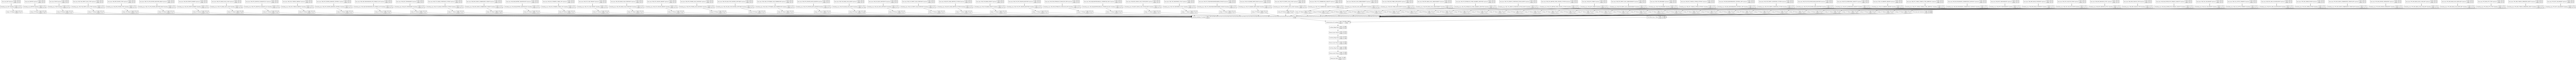

In [144]:
# plot the model
plot_model(model=model_emb, to_file='model_emp.png', show_shapes=True, dpi=300)

In [145]:
model_emb.summary()

Model: "Categorical_Embeddings"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_layer_DAY (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_layer_MONTH (InputLayer)  [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_layer_YEAR (InputLayer)   [(None, 1)]          0                                            
__________________________________________________________________________________________________
Input_layer_VAR_7MA_FRONT_AXLE_ [(None, 1)]          0                                            
_____________________________________________________________________________

## Inputs to the Network

We need to create a list of inputs, such that each categorical feature has it's own list of values and the last list will be a 2D array of the continous values. As shown above.

The size of the list of inputs : ip = n_cat + 1

Remember for each of the embedding network we had set input-size =1 we are taking 1 value each from all the list (except the last list) and sending it to the combined network for training. For the last list, each value itself is a list having the other columns values, and this is sent to the models_rest network

In [0]:
# function to reformat the input data into the necessary input data for our network to be trained on.
def network_input_process(data_num, data_cols):
  # create a list of inputs. 
  cat_size = data_cols.shape[1]
  # define the size of the network list inputs
  network_inputs = [None] * (cat_size + 1)

  # add inputs to the list
  # for the categorical inputs
  for i in range(cat_size):
    network_inputs[i] = pd.factorize(data_cols.iloc[:, i].values)[0]

  # for the continuous value inputs
  network_inputs[-1] = data_num.iloc[:, :].values

  # that should be all
  return network_inputs

In [0]:
n_inputs = network_input_process(data, data_cat)

## Training the Network

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [0]:
# fitting the model
model_emb.fit(x=X_train, y=y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stop])